In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/4_logistic

/content/drive/MyDrive/Colab Notebooks/4_logistic


In [3]:
ls

'10_Titanic problem comparing all models.ipynb'
'1_titanic survival prediction using logistic regression (Beginner Tuto).ipynb'
'2_titanic survival prediction using Linear regression (Beginner Tuto).ipynb'
'3 titanic survival prediction (Decesion Tree).ipynb'
'4 titanic survival prediction (Random Forest).ipynb'
'5_K Nearest Neighbor titanic .ipynb'
'6_Linear Support Vector Machine Titanic.ipynb'
'7_Stochastic Gradient Descent (SGD) Titanic DATA.ipynb'
'8_Perceptron Titanic.ipynb'
'9_RandomForestRegressor for titanic.ipynb'
 gender_submission.csv
 test.csv
 train.csv


# **Random Forst for  Titanic Survival Prudiction**

###  **Problem framing**

 ### the goal is to predict whether a passenger survived or not based on the available features 

## 1 import the data

In [4]:
import pandas as pd
import numpy as np

## 2 data analysing and preprocessing


In [5]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submession=pd.read_csv('gender_submission.csv')

In [6]:

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



1.   number of  attributes are   12
2.   number of instance  is     889
3.   Some varibale have less then 891 instance wich means we have missing values we need tp handle that after 
4.   we have diffrente attribute type 
5.   we should uniforme all varibale to be numerical 
(the model doesnt undrstand textuelle type )








In [9]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

<ipython-input-9-3aec8dcbe917>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

in order to get full insight about which attrbute are more correlated to survived target we have to deal with textuelle variable .


## ***VARIABLE 1 : 'Sex'  ***

In [10]:
# let's transform    SEX  variable  using  sickit learn Encoder 
#   male  then  value will be 1 
#  female then value will be 0 

#Example of how the tronsformer is used 
from sklearn.preprocessing import OrdinalEncoder
# create a sample dataset
X = [['Male'], ['Female'],['Male'], ['Female'],['Female'],['Female'],['Female']]
print(X)
# create an instance of the encoder
encoder = OrdinalEncoder()
# fit the encoder to the data
encoder.fit(X)
# transform the data
X_encoded = encoder.transform(X)
print(X_encoded)

[['Male'], ['Female'], ['Male'], ['Female'], ['Female'], ['Female'], ['Female']]
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [11]:
df_Sex=df_train[['Sex']]
df_Sex.value_counts()


Sex   
male      577
female    314
dtype: int64

In [12]:
 cat_encoder = OrdinalEncoder()
# df_Sex_Encoder = cat_encoder.fit_transform(df_Sex)
df_Sex_Encoder=pd.DataFrame(cat_encoder.fit_transform(df_Sex).astype('int64'),columns=["Sex"])

In [13]:
df_Sex_Encoder.head(10)

,Sex
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [14]:
#lets replace the textuelle categorical variable in train data with the new data.
df_train['Sex']=df_Sex_Encoder
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Now we shall move to another attribute 
PS: never forget that we have to do the same thing in the testing data set 

In [15]:
df_test2=df_test.copy()

In [16]:
df_test2['Sex']=pd.DataFrame(cat_encoder.fit_transform(df_test2[['Sex']]).astype('int64'),columns=["Sex"])
df_test2
#now that we are sure that everything is good w should replace this is in the real testing data 
df_test=df_test2

it is recommonded to let this manupilation until the end of the procces so you wont have a look at the testing data and fell in the  
**Data** **Snooping** **bias** 


## ***VARIABLE 2 : 'Embarked'  ***

In [17]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

"Embarked" refers to the port of embarkation or the port where a passenger boarded the Titanic 
he "Embarked" feature in the dataset has three possible values:
1.  C - Cherbourg: This indicates that the passenger boarded the Titanic from the port of Cherbourg, located in France.
2.  Q - Queenstown (now known as Cobh): This indicates that the passenger boarded the Titanic from the port of Queenstown, which is now called Cobh and is located in Ireland.
3.  S - Southampton: This indicates that the passenger boarded the Titanic from the port of Southampton, which is located in England.

after a analysing the data (the relation between target variable and ambarked variable it seems thet the corelation between them is negligable)
thus we can drop the embarked varibale

In [18]:
# Correlation here feels a bit wrong, but I guess you could factorize the status.
# Assuming you have your data in a Pandas DataFrame df:
df_train2=df_train
from pandas import factorize

labels, categories = factorize(df_train2["Embarked"])
df_train2["labels"] = labels
abs(df_train2["Survived"].corr(df_train2["labels"]))

0.10184881923179388

 we shouldnt trust this result because :This Encoding can mislead the analysis or models into assuming a meaningful relationship or order where none exists.

instead if we want to be sure about the correlation between numericla and categorical we should use  **ONE HOT ENCODER** , each category is transformed into a separate binary column, with a value of 1 indicating the ***presence*** of that category and 0 indicating its **absence**

In [19]:
del df_train2["labels"]  ## lets drop this encoded feature 

In [20]:
#Using One hot Encoder 
from sklearn.preprocessing import OneHotEncoder
OneHot_encoder = OneHotEncoder()

In [21]:
try:
  df_cat_1hot = pd.DataFrame(OneHot_encoder.fit_transform(df_train2[['Embarked']]).toarray(),columns=['c','q','s','unk'])
except:
  print('cant')

In [22]:
df_cat_1hot.head(5)
del df_cat_1hot['unk']

In [23]:
df_train2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_train2 = df_train2.join(df_cat_1hot)
try:
  del df_train2['Embarked']
except:
  print('variable is already droped')
# df_train=df_train2

In [25]:
df_train2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,c,q,s
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1.0,0.0,0.0


In [26]:
corr_matrix2 = df_train2.corr()
corr_matrix2["Survived"].sort_values(ascending=False)

<ipython-input-26-f37cb5ec2eeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = df_train2.corr()


Survived       1.000000
Fare           0.257307
c              0.168240
Parch          0.081629
q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
s             -0.155660
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

the correlation between survived and Embarked C and S is hight it might influnce the result also Q , to be more certain about that lets plot the result

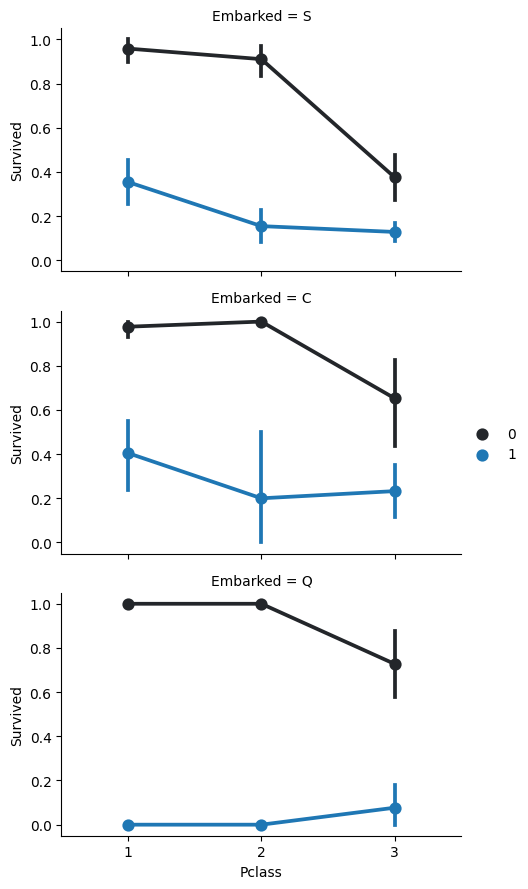

In [27]:
import seaborn as sns
FacetGrid = sns.FacetGrid(df_train, row='Embarked',aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

1.  black :women 
2.  blue :man  
3.  Women on port Q,C and on port S have a higher chance of survival

4.  clearly there is a correlation betwwen Embarkad and survived 

In [28]:
## lets do the same thing for testing data
df_cat_1hot2 = pd.DataFrame(OneHot_encoder.fit_transform(df_test2[['Embarked']]).toarray(),columns=['c','q','s'])
df_cat_1hot2

,c,q,s
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
413,0.0,0.0,1.0
414,1.0,0.0,0.0
415,0.0,0.0,1.0
416,0.0,0.0,1.0


In [29]:
df_test2=df_test2.join(df_cat_1hot2)

In [30]:
try:
  del df_test2['Embarked']
except:
  print('variable is already droped')
df_test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,c,q,s
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0.0,0.0,1.0


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [32]:
df_train=df_train2
df_test=df_test2
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  c            418 non-null    float64
 11  q            418 non-null    float64
 12  s            418 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 42.6+ KB


## ***VARIABLE 3 : 'Pclass'  ***

this variable is numerical dosent need ragralization we just want to study it

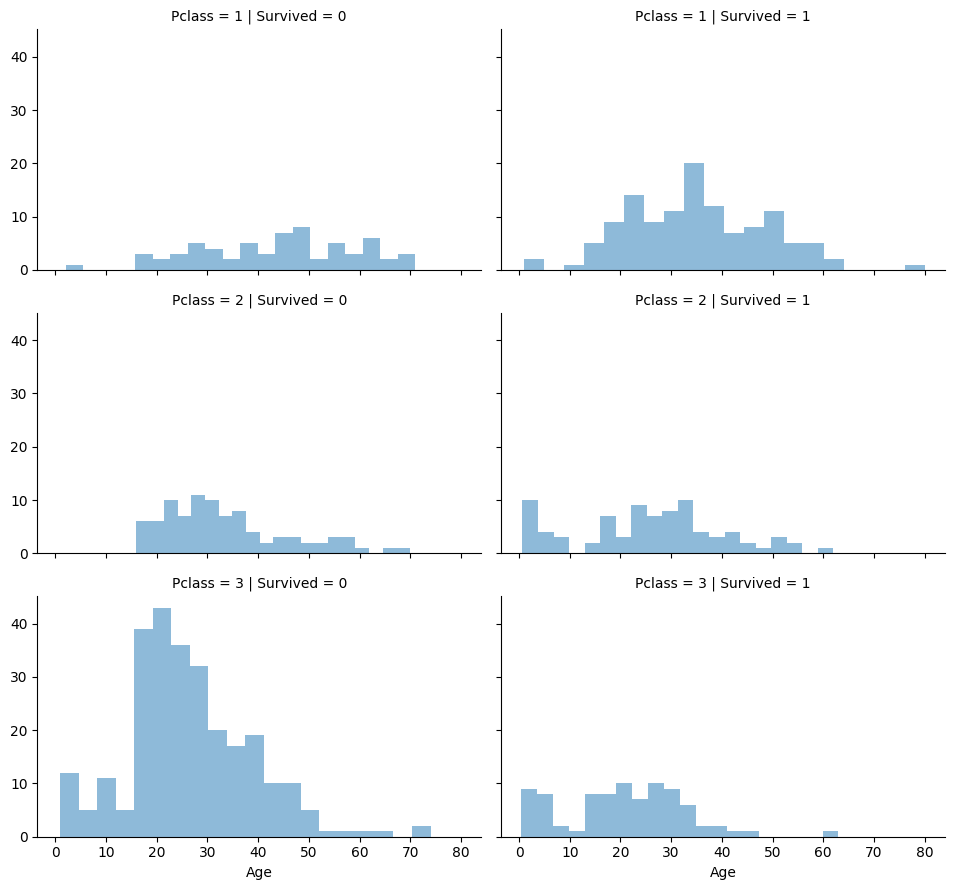

In [33]:
import matplotlib.pyplot as plt
grid = sns.FacetGrid(df_train2, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

 we can spot that there is a high probability that a person in pclass 3 will not survive

 there is a very raltion ships between your agr and probabilty of being rescued 

## ***VARIABLE 4 : 'SibSp and Parch' ***

1.  SibSp : represents the number of siblings/spouses aboard the Titanic for each passenger
2.  Parch : It represents the count of parents (mother or father) and children (daughter or son) that a specific passenger had aboard the Titanic.
3. Both SibSp and Parch provide insights into the family size or composition of passengers on the ship
4. it will be more helpful if join them in one variable that has the number of familly member.


In [34]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

In [35]:
data = [df_train, df_test]
for dataset in data:
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [36]:
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

now lets see the correltion between being alone and survived.

In [37]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

<ipython-input-37-3aec8dcbe917>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


Survived       1.000000
Fare           0.257307
c              0.168240
Parch          0.081629
relatives      0.016639
q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
s             -0.155660
not_alone     -0.203367
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

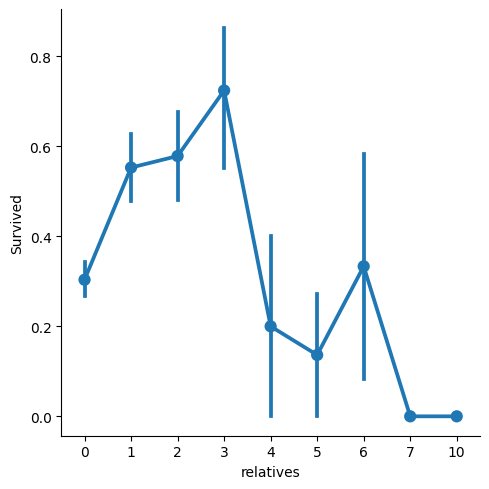

In [38]:
sns.catplot(x="relatives", y="Survived", kind="point", data=df_train)

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

##*** VARIABLE 5 : 'Fare ***



fare" refers to the amount of money that a passenger paid for their ticket on the Titanic

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  c            891 non-null    float64
 12  q            891 non-null    float64
 13  s            891 non-null    float64
 14  relatives    891 non-null    int64  
 15  not_alone    891 non-null    int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 111.5+ KB


## ***VARIABLE 6 : 'Ticket*** 

since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [40]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

## ***VARIABLE 7 : 'cabin*** 

Cabin variable may be valuble but need little bit of modification 
i will just drop it 

In [41]:
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

## ***VARIABLE 8 : 'Name*** 

Name will help us detct the gender of the passenger wither young or old 

In [42]:
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

## ***VARIABLE 9 : Age*** 

Scince the age is an important variable we will create another variable that contain ages categories 


### lest handle first missing value

In [43]:
## dealing with missing value  simply ramplacing it with mean 
mean_of_age=df_train['Age'].mean()
df_train['Age'].fillna(mean_of_age,inplace=True) 
df_test['Age'].fillna(mean_of_age,inplace=True)
df_test['Fare'].fillna(df_train['Fare'].mean(),inplace=True)

In [44]:
data = [df_train, df_test]
for dataset in data:
    dataset['s'] = dataset['s'].fillna(0)
    dataset['q'] = dataset['q'].fillna(0)
    dataset['c'] = dataset['c'].fillna(0)

In [45]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
c              0
q              0
s              0
relatives      0
not_alone      0
dtype: int64

In [46]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
c              0
q              0
s              0
relatives      0
not_alone      0
dtype: int64

In [47]:
data = [df_train, df_test]
for dataset in data:
    # dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age_cat'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age_cat'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age_cat'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age_cat'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age_cat'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age_cat'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age_cat'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age_cat'] = 6

# let's see how it's distributed 
df_train['Age'].isnull().sum()

0

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   c            891 non-null    float64
 9   q            891 non-null    float64
 10  s            891 non-null    float64
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int64  
 13  Age_cat      891 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 97.6 KB


In [49]:
# unfiroming the typee of varible to be int 
data=[df_train,df_test]
for dataset in data:
  dataset['c'] = dataset['c'].astype(int)
  dataset['q'] = dataset['q'].astype(int)
  dataset['s'] = dataset['s'].astype(int)
  dataset['Fare'] = dataset['Fare'].astype(int)
  dataset['Age'] = dataset['Age'].astype(int)
  dataset['Age_cat'] = dataset['Age_cat'].astype(int)


In [50]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int64
 8   c            891 non-null    int64
 9   q            891 non-null    int64
 10  s            891 non-null    int64
 11  relatives    891 non-null    int64
 12  not_alone    891 non-null    int64
 13  Age_cat      891 non-null    int64
dtypes: int64(14)
memory usage: 97.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null

In [51]:
## drop Passenger ID because it hase no meaning to the target
try:
  del df_train['PassengerId']
  del df_test['PassengerId']
except:
  print('already droped')

In [52]:
print(df_train.shape)
print(df_test.shape)

(891, 13)
(418, 12)


## ***Lets build our model ***

In [53]:
## import all libarray 
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [54]:
# seprate  features  from target 
X = df_train.drop("Survived", axis=1)
Y = df_train["Survived"]

## sumbmission data that we want to predict 
testing_data=df_test

In [55]:
# test and train data //  only thr training data so we can meauser the accurcy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Random Forest model** 




In [59]:
Random_forest = RandomForestClassifier()
Random_forest.fit(X_train, y_train)

Y_pred = Random_forest.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score
score =accuracy_score(Y_pred, y_test)
acc_Random_forest = round(Random_forest.score(X_train, y_train) * 100, 2)
print("train_acc=",acc_Random_forest,'%')
print("test_acc=",round(score*100,2),'%')

train_acc= 95.79 %
test_acc= 82.68 %



### ACCuracy 
   Test= 82%
   Train =96%
    
#### even the result is pretty good we can improve it by either 
2. training onother model that will detcect comlpex pattern 
3. tuning the parametre 
4. re proccesing the data add nez featers or delet one if its needed 
